<!--
Copyright (c) Meta Platforms, Inc. and affiliates.
This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree.
-->
<div style="text-align: center;">
  <img src="website/static/img/LTVision-logo.png" alt="Logo" style="width:400px;"/>
</div>

***

<div style="font-size: 32px; color: #0b2287; text-align: center;">Welcome to LTVision - Module 1</div> <br>

**LTVision** is an open-source library from Meta, designed to empower businesses to unlock the full potential of predicted customer lifetime value (pLTV) modeling.

**Our vision** is to lead the industry by building a community of pLTV practitioners that drives innovation and creates value for everyone in the pLTV ecosystem through expertise, education, and thought leadership. <br>

Our first release - **Module 1**, is now available. It focuses on generating customer insights and estimating the potential pLTV opportunity size, enabling business decision-makers to evaluate the potential ROI of this initiative before investing in a pLTV model and pLTV strategy.

Copyright (c) Meta Platforms, Inc. and affiliates.  <br>
This open source code is licensed under the BSD-style license, which can be found in the LICENSE file in the root directory of this source tree.
***

**Table of Contents**
- [Data Preparation](#Data-Preparation)
- [Data Validation](#Data-Validation)
- [Purchase Frequency](#Purchase-Frequency)
- [Top spenders'contribution to total revenue](#Top-spenders'-contribution-to-total-revenue)
- [Time to First Purchase](#Time-to-First-Purchase)
- [Correlation between short-term and long-term revenue](#Correlation-between-short-term-and-long-term-revenue)
- [Purchaser Flow Overtime](#Purchaser-Flow-Overtime)
- [pLTV Opportunity Size Estimation](#pLTV-Opportunity-Size-Estimation)
- [LTVision Module 1 Insights Summary](#LTVision-Module-1-Insights-Summary)

**We Value Your Feedback!** <br>
We are constantly looking to improve LTVision and your feedback is invaluable to us! <br>
Please [take our survey](https://docs.google.com/forms/d/e/1FAIpQLSdNSuy3pTWM8HnBWuLNbS0hdkATTUmrByjWyzyWV-Jfu3Y1lw/viewform?usp=header) to share your feedback or questions! Thank you for helping us improve! <br>

In [1]:
from src import LTVSyntheticData
from src import LTVexploratory
from src.graph import save_plot
import plotly.io as pio
pio.renderers.default = "iframe"

***
# Data Preparation

## Generate simulated data or import your own 

To demonstrate an end-to-end implementation of LTVision Module 1, run the below code to generate simulated demo data for 20,000 users with purchases over a period of 180 days. <br>
  

In [2]:

synth_data_gen = LTVSyntheticData(n_users=20000, random_seed=42)
customer_table = synth_data_gen.get_customers_data()
event_table = synth_data_gen.get_events_data()


**Please note:** 
- All comments and insight statements underneath each output are hard coded based on the demo data with the above parameters. Any changes to the parameters (such as random_seed=42) will change the demo data and outputs. <br>
- When you are ready to run LTVision Module 1 with your own data, follow the data requirements in the documentation and run the following code to import your data by updating ‘example.csv’ with your file path and name: <br>
      
*customer_table = pd.read_csv('example.csv')* <br>
*event_table = pd.read_csv('example.csv')*


## Format data

Before analysis begins, use the `LTVexploratory()` function to map data into structured formats. <br>

In [3]:

da = LTVexploratory(
    customer_table,
    event_table,
    registration_time_col='registration_date',
    event_time_col='event_date',
    event_name_col='event_name',
    value_col='value',
    rounding_precision = 1
    )

If you are importing your own data, make sure to check the summary statistics of your data file both before and after the LTVexploratory function, in case some records may have been dropped by the function.  <br>

***

# Data Validation

## Customer & Event table overview

The *‘customer’* table is a user-level table that records the initial interaction date, or day 0, for each user who has engaged with the business. This initial interaction could be installing the App or making a first purchase. <br> 

In [4]:
customer_table.head()

,UUID,registration_event_name,country,device,download_method,registration_date
0,1.0,first_app_open,IN,android,wifi,2020-01-02
1,2.0,first_app_open,BR,android,wifi,2022-06-27
2,3.0,first_app_open,ES,ios,wifi,2020-05-08
3,4.0,first_app_open,IN,ios,wifi,2022-03-15
4,5.0,first_app_open,US,android,mobile_data,2020-01-19


The *‘event’* table is a transaction-level documentation of all revenue-generating events completed for the advertising unit. <br> 

In [5]:
event_table.head()

,UUID,event_date,days_since_registration,event_name,value
17,12.0,2022-04-13,17,purchase,1.580250
25,12.0,2022-04-21,25,purchase,154.465789
296,27.0,2021-05-22,16,purchase,1.038395
887,71.0,2022-12-21,2,purchase,2.319024
895,71.0,2022-12-29,10,purchase,4.218515


Here are basic descriptive statistics of both datasets through the `summary()` function.

In [6]:
da.summary()


    **Customer Data Table**
    - Date start:    2020-01-01 00:00:00
    - Date end:      2022-12-31 00:00:00
    - Period:        3.00 years
    - Total Customers: 20,000 customers.
    - Total Events: 20,000 events.
    

    **Event Data Table**
    - Date start:    2020-01-04 00:00:00
    - Date end:      2022-12-31 00:00:00
    - Period:        2.99 years
    - Total Customers: 871 customers.
    - Total Events: 3,446 events.
    - Unique Event Types: 1.
    - Event list: ['purchase']
    - Average Events per Customer: 3.96 events/customer.
    


## Customer & Event table overlap

The `plot_customers_intersection()` function shows how much percent of customers are actually purchasers and whether there are customers who are present in the customer table but not present in the events table, and therefore need to be excluded from following analysis.<br> 

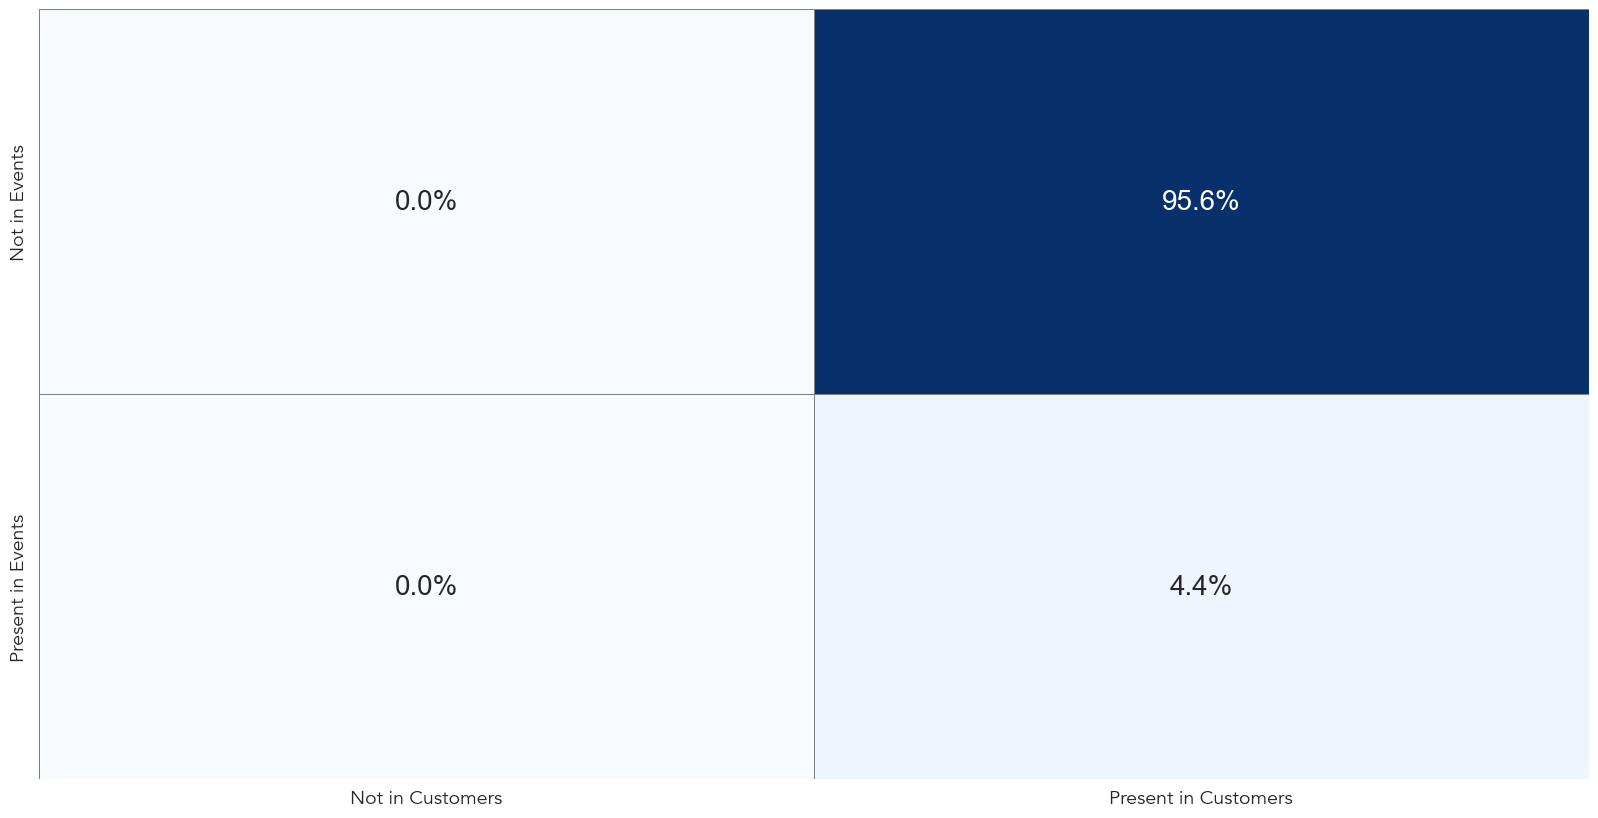

In [7]:
# Intersection between users in the two datasets
fig, data = da.plot_customers_intersection()
save_plot(fig, "images/customer_intersection.png")

> From the demo data output we can see that: <br> 
>> 1. Upper left: should always be 0% <br> 
>> 2. Upper right: 95.6% of customers are not generating any revenue events  <br> 
>> 3. Lower left: 0% means everyone in the customer table are also in the events table, therefore, there’s no need to exclude any customers from the events table for the following analysis  <br> 
>> 4. Lower right: 4.4% of all customers are revenue-generating customers or purchasers <br> 

***
# Purchase Frequency

The `plot_purchases_distribution()` function visualizes the purchase frequency among all purchasers. <br> 

This function has two input parameters: <br> 

- *days_limit:* This parameter defines the minimum duration since a customers’ initial interaction, for them to be included in this  visualization. In this example, the time frame is set at 60 days, but you can change it to a time frame that makes most sense for your business. (e.g. 30 days, 120 days or 365 days etc.)<br> 

- *truncate_share:* This parameter defines the percentage of all purchasers that are shown in this visualization, or the percentage of ‘outliers’ that are excluded from this visualization, to make this histogram easier to read. In this example, the truncate_share is set to 0.999, which means that the top 0.1% of the highest spenders were excluded from this visualization.<br> 


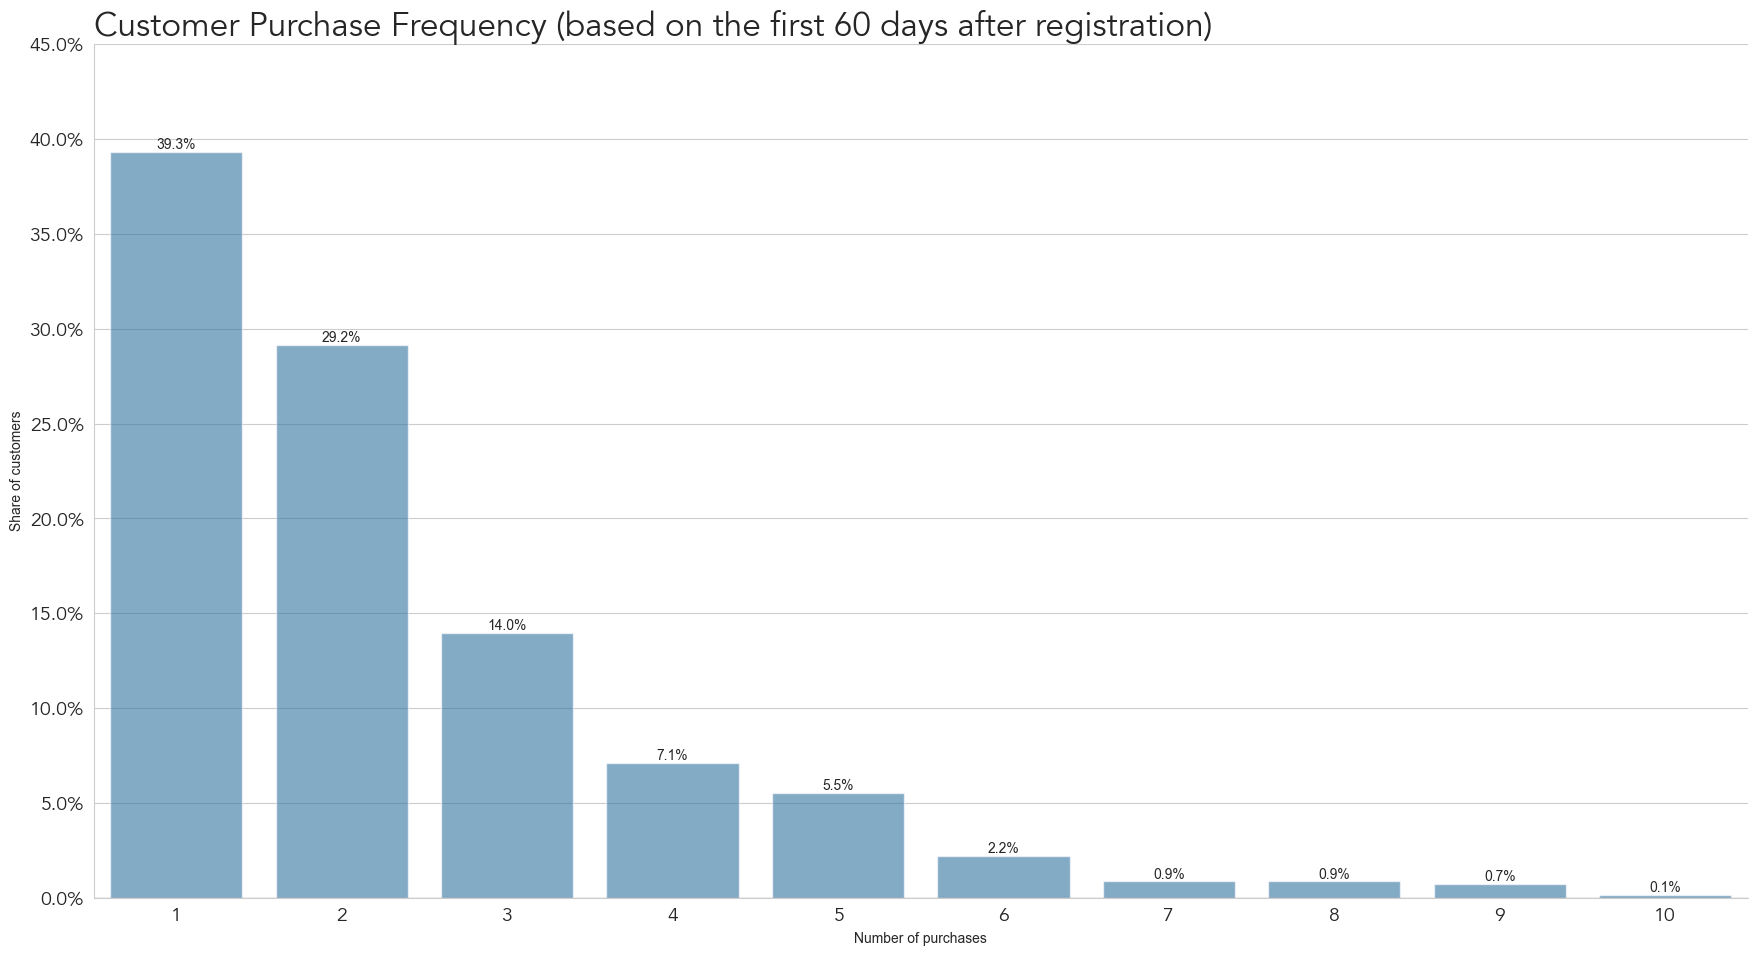

In [8]:

fig, data = da.plot_purchases_distribution(days_limit=60, truncate_share=0.999)
save_plot(fig, "images/purchases_distribution.png")
fig

> From the demo data output, we can see that:  
>> - 39% of all purchasers have purchased only once， which means 61% of purchasers have purchased more than once
>> - 29% purchased twice
>> - 14% purchased three times

***
# Top spenders' contribution to total revenue

The `plot_revenue_pareto()` function visualizes if a significant portion of revenue was contributed by a small group of high spenders.<br> 

Similar to *“plot_purchases_distribution”*, the *“plot_revenue_pareto”* function uses the same days_limit parameter to generate the output and it operates on the same customer cohorts as the *“plot_purchases_distribution”* function. <br>

- *days_limit:* Defines the minimum duration since a customers’ initial interaction, for them to be included in this visualization. In this example, the limit is set at 60 days.<br> 


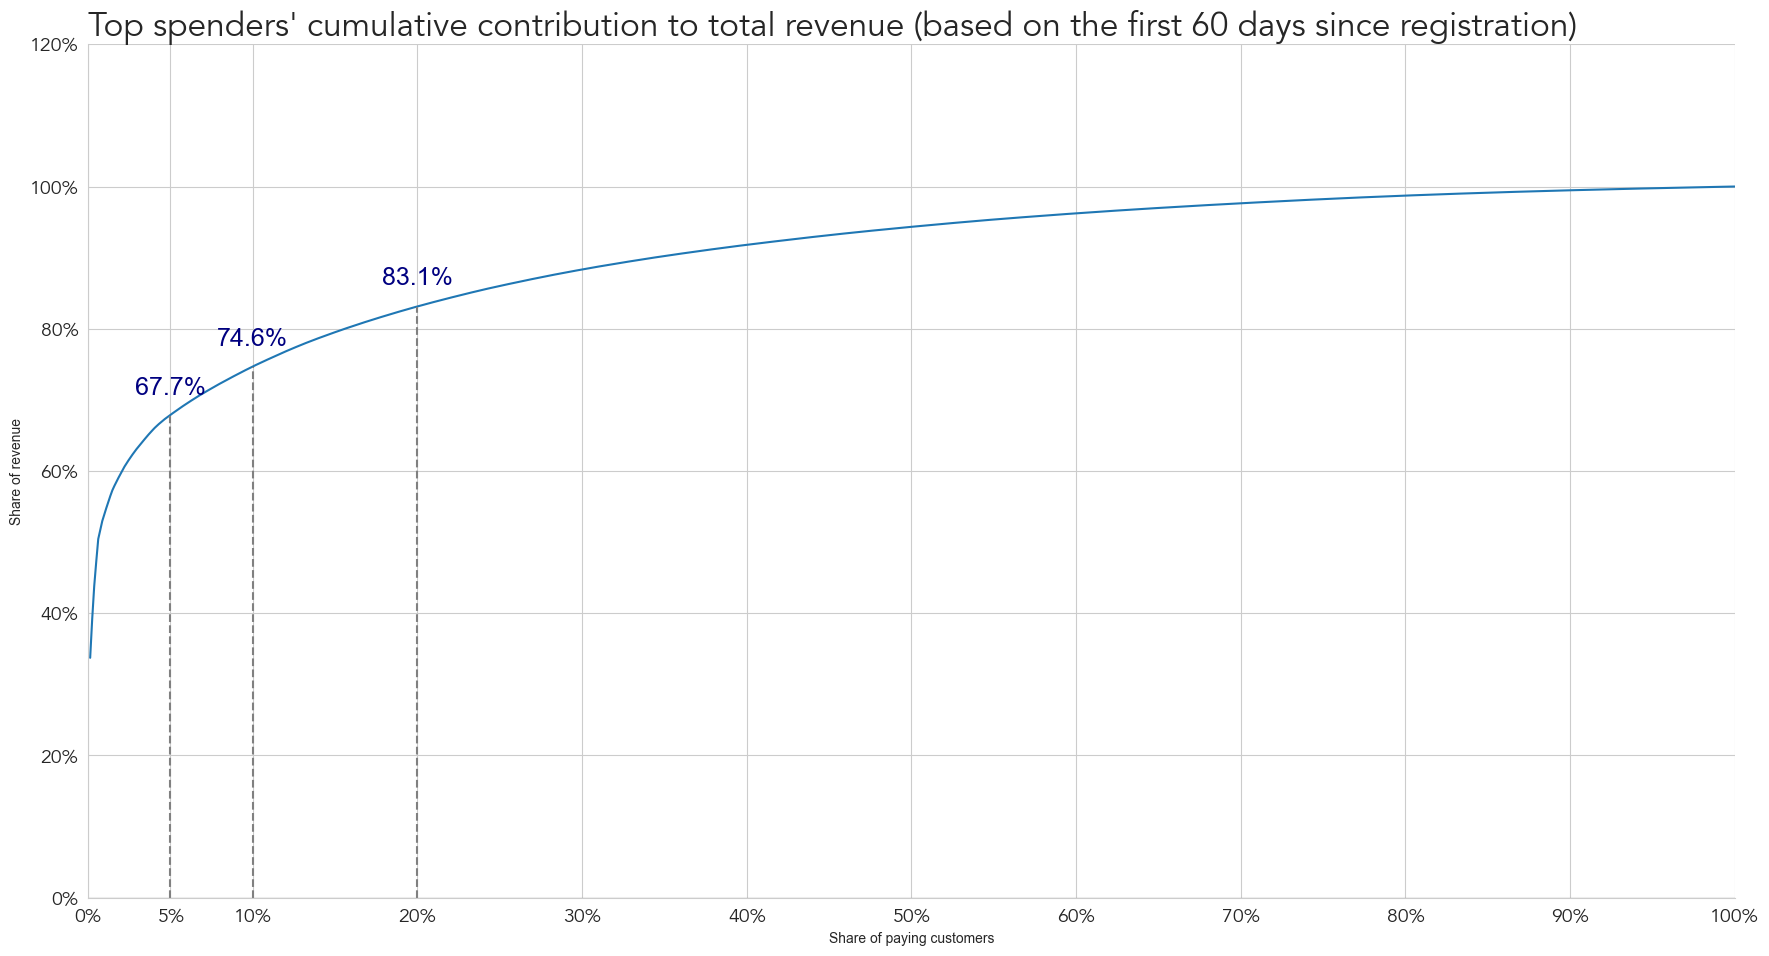

In [9]:

fig, data = da.plot_revenue_pareto(days_limit=60)
save_plot(fig, "images/revenue_pareto.png")
fig


> From the demo data output we can see that: <br> 
>> - The top 5% highest spending customers contributed to 67.7% of total revenue<br>
>> - The top 10% spenders contributed to 74.6% of total revenue<br>
>> - The top 20% spenders contributed to more than 83% of total revenue<br>

***
# Time to First Purchase

The `plot_customers_histogram_per_conversion_day()` function visualizes the duration between the initial interaction and the first purchase.<br> 
This function also uses the *days_limit* parameter. <br>

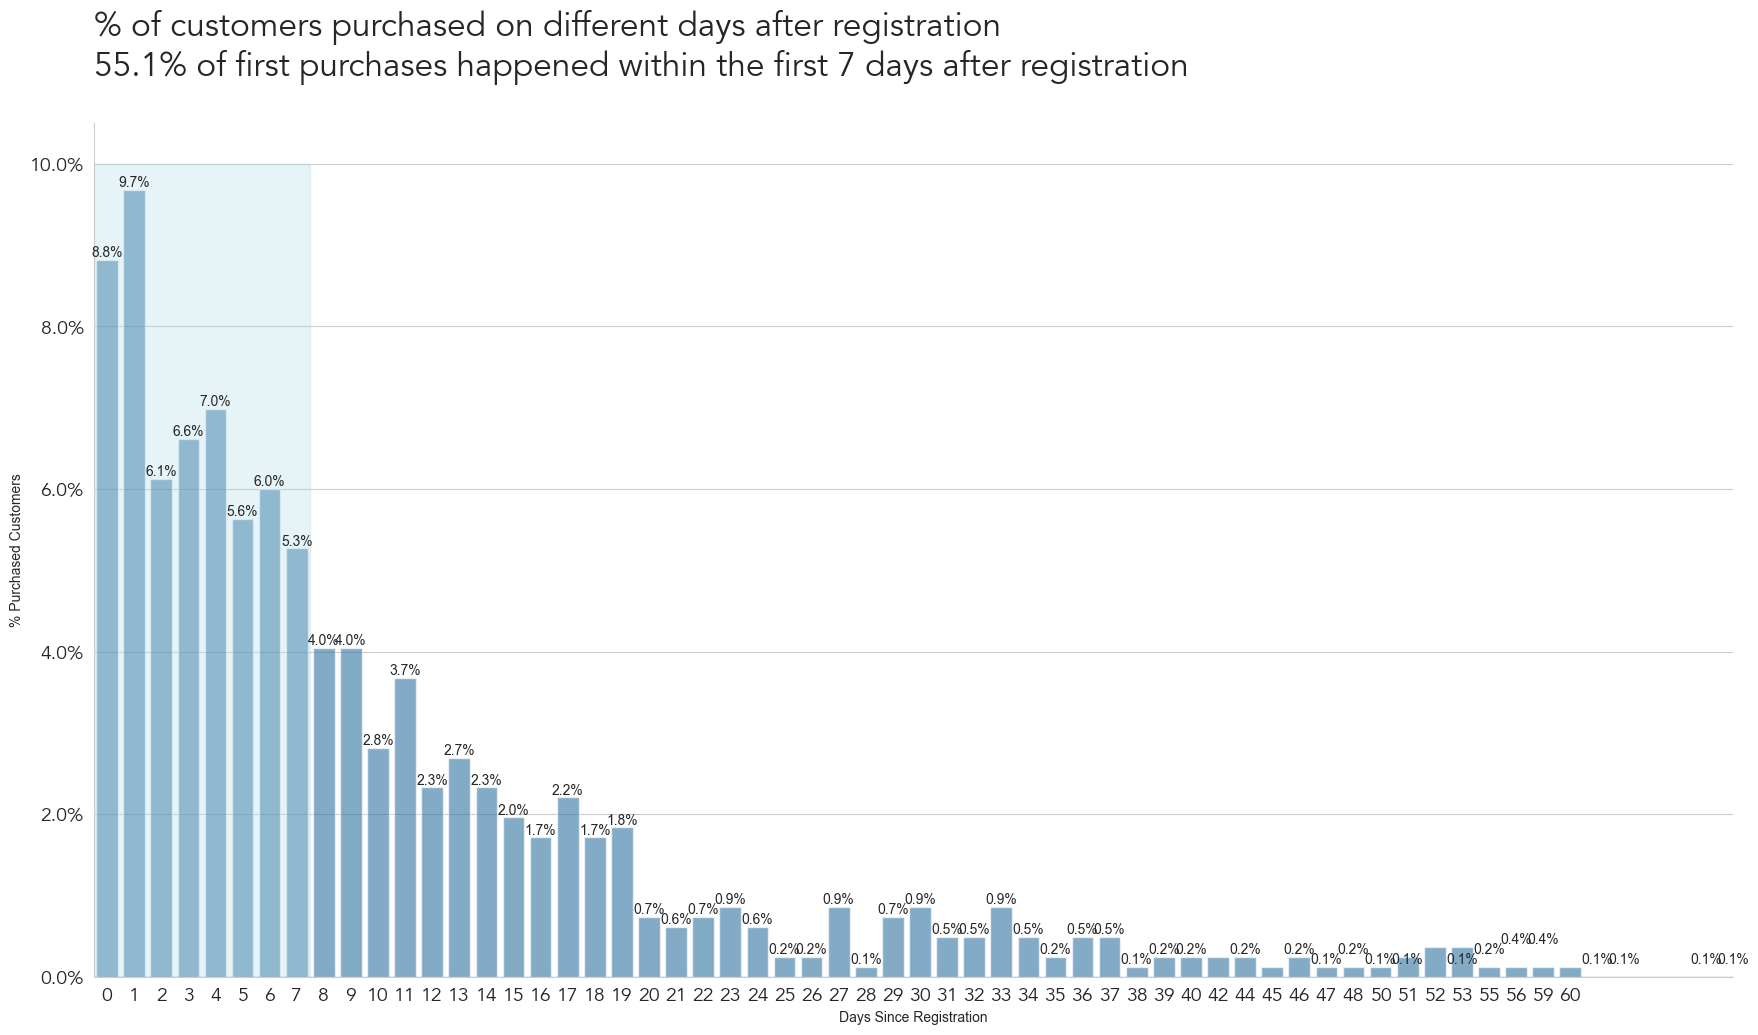

In [10]:

fig, data = da.plot_customers_histogram_per_conversion_day(days_limit=60)
save_plot(fig, "images/customers_histogram_per_conversion_day.png")
fig


> From the demo data output we can see that:
>> - 55% of first-time purchases happened within 7 days of the initial interaction<br>
>> - Since the remaining 45% of first purchases happen beyond the 7-day optimization window, it means that the current digital customer acquisition campaign is missing out on 45% of the purchases that happen outside the 7-day optimization window<br>

***
# Correlation between short-term and long-term revenue

The `plot_early_late_revenue_correlation()` function demonstrates the correlation between short-term and long-term purchase values across various timeframes. <br>
This function also uses the *days_limit* parameter.<br>

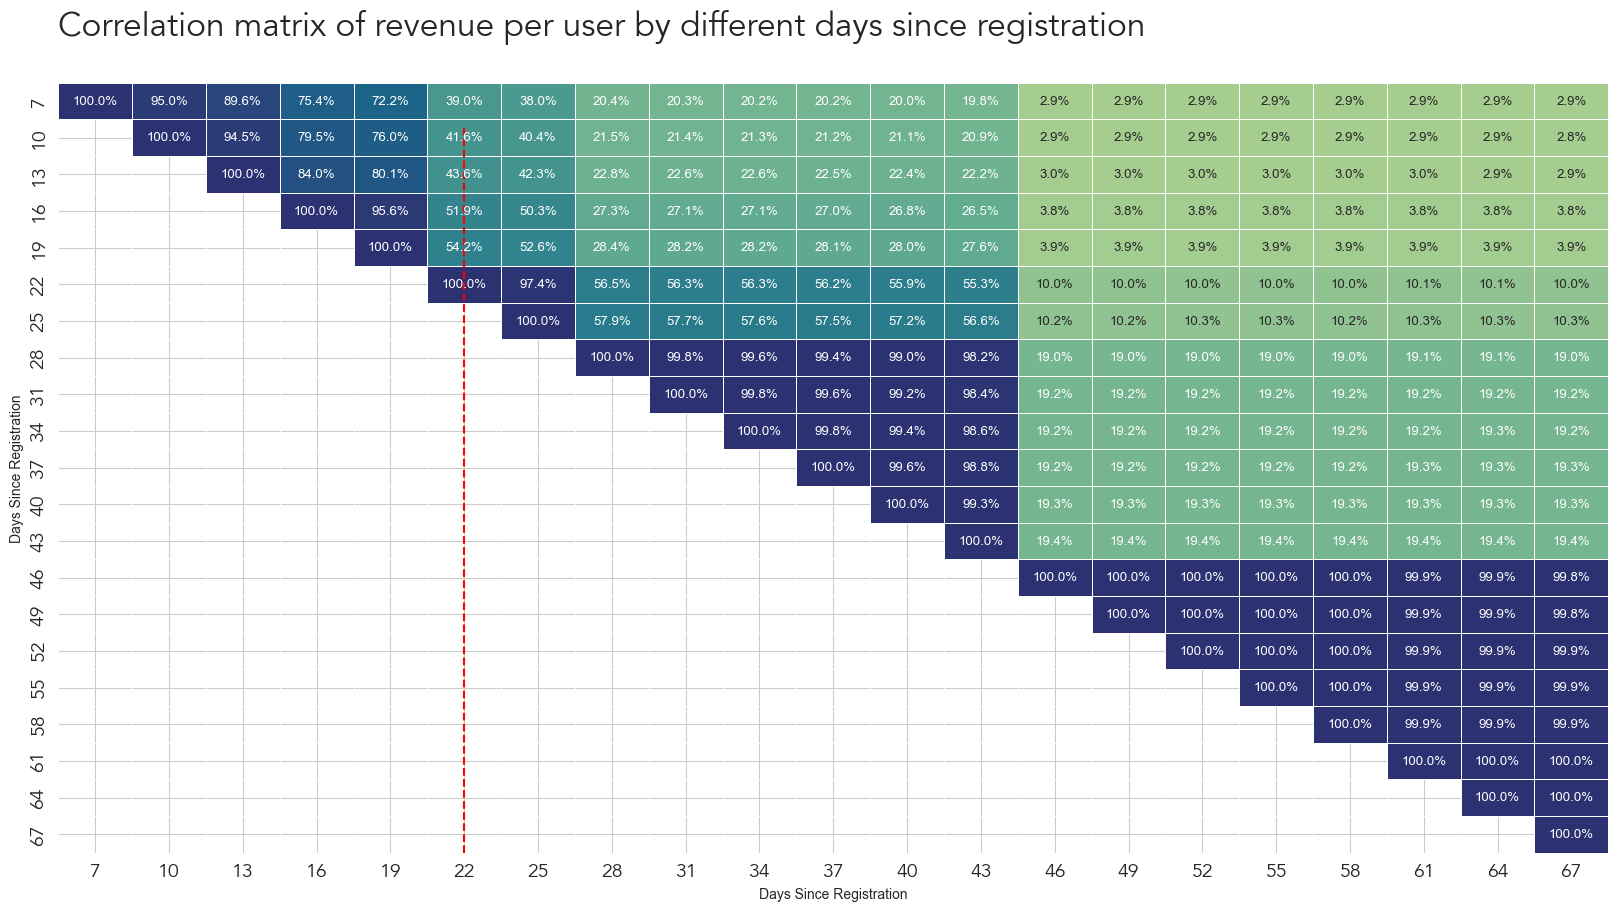

In [11]:

fig, data = da.plot_early_late_revenue_correlation(days_limit=70)
save_plot(fig, "images/early_late_revenue_correlation.jpeg")


> From the demo data output we can see that:  <br>
>> - There is high correlation in early time frames. For example, the correlation between day-7 revenue and day-10 revenue is a robust 95%
>> - However, as time progresses, the correlation between day-7 revenue and future revenue weakens significantly. By day-22, this correlation has already dropped below 40%. This suggests that day-7 revenue is not a reliable indicator for revenue on day-22 and beyond.
>> - This diminishing correlation between early and later revenue is a crucial indicator of the potential value a pLTV strategy could bring to a business.<br>


***
# Purchaser Flow Overtime

The `plot_paying_customers_flow()` function provides further insights into purchasers’ buying behavior overtime, showing how low, medium and high purchasers flow to the same or different classes at a later point in time. <br>

This function has two input parameters: <br>

- *early_limit:* This parameter sets the time stamp on the left axis, which shows the cumulative value of a customer by that early point in time, categorized into equally sized and ranked groups: No spend, low spend, medium spend and high spend; It’s set to 7 days by default because most digital campaigns have a 7-day optimization window.

- *days_limit:* This parameter sets the time stamp on the right axis, which shows the cumulative value of the same customer at a later point in time, again categorized into equally sized and ranked groups: low spend, medium spend and high spend; feel free to play with this parameter and experiment with different future timestamps (e.g. 120 days, 180 days, 365 days etc.), to gain a more nuanced exploration of your customers’ purchasing behavior across different time frames. 

**Please note** that this visualization includes ALL purchasers defined by the days_limit parameter. In this example, early_limit is set to 7 days and days_limit is set to 60 days, which means this visualization includes ALL purchasers up to day 60 from initial interaction. <br>

In [12]:

fig, data = da.plot_paying_customers_flow(days_limit=60, early_limit=7, spending_breaks={}, end_spending_breaks={})
save_plot(fig, "images/paying_customer_flow.png", dpi=400) # you can increase the dpi to get a higher resolution
fig

Starting spending breaks: {'No spend': 0, 'Low spend': 1.71, 'Medium spend': 3.91, 'High spend': 224.0}
Ending spending breaks: {'No spend': 0, 'Low spend': 2.93, 'Medium spend': 8.02, 'High spend': 6007.0}


In [13]:
data


,early_class,late_class,customers,perc_total_customers,average_cumulative_early_revenue,cumulative_early_revenue,average_cumulative_late_revenue,cumulative_late_revenue
0,No spend,No spend,0.0,0.0%,0.0,0.0,0.0,0.0
1,No spend,Low spend,156.0,19.1%,0.0,0.0,1.8,273.7
2,No spend,Medium spend,111.0,13.6%,0.0,0.0,4.7,523.2
3,No spend,High spend,99.0,12.1%,0.0,0.0,102.8,10178.0
4,Low spend,No spend,0.0,0.0%,0.0,0.0,0.0,0.0
5,Low spend,Low spend,68.0,8.3%,1.3,88.9,1.7,112.9
6,Low spend,Medium spend,38.0,4.7%,1.3,49.9,4.9,185.8
7,Low spend,High spend,44.0,5.4%,1.3,56.7,61.1,2688.8
8,Medium spend,No spend,0.0,0.0%,0.0,0.0,0.0,0.0
9,Medium spend,Low spend,48.0,5.9%,2.3,109.6,2.3,109.6


> From the demo data output we can see that: <br>
>> - 27% of no spenders by day-7 became high spenders by day-60 (99/(156+111+99) = 27%)
>> - 29% of low spenders by day-7 became high spenders by day-60 (44/(68+38+44) = 29%)
>> - 23% of medium spenders by day-7 became high spenders by day-60 (35/(48+67+35) = 23%)
>> - In total, 66% of high spenders by day-60 were not high spenders at day-7 ((99+44+35)/(99+44+35+93) = 178/271 = 66%)
>> - Feel free to adjust the days_limit parameter to explore how purchase behavior and pLTV opportunities may change across different time frames <br>


***
# pLTV Opportunity Size Estimation

**The goal of estimating the pLTV opportunity size is to enable businesses to make informed decision on whether investing in pLTV models and strategies should take priority over other initiatives and which market/business unit should the business invest in first.** <br>

## Key Definitions

**pLTV opportunity size** refers to the potential additional revenue generated by building a pLTV model and activating a pLTV strategy, compared to the business’ existing customer acquisition strategy, to help business decision makers evaluate the potential ROI of the pLTV initiative. <br>

<div style="font-size: 20px; color: #0b2287; text-align: center;"> Opportunity Size = pLTV Revenue - BAU Revenue </div> <br> 

- **BAU Revenue**: Business-as-usual revenue generated by a broad targeted Customer Acquisition strategy, optimizing towards a standard revenue event (e.g. Purchase, Subscription, in-app purchase etc.).
- **pLTV Revenue**: Revenue generated by a broad targeted Customer Acquisition strategy optimizing towards high-pLTV customers. <br>

## How can pLTV initiatives drive additional revenue?
- **A pLTV model:** Customers are not created equal, and their revenue contribution to a business’ long-term success varies. Therefore, a pLTV model is needed to help businesses accurately identify high-value customers that are crucial to a business’ long-term success.
- **A pLTV strategy:** Digital customer acquisition campaigns are bound by attribution windows (e.g.7 days), but not all purchases/revenue events happen within 7 days after ad exposure, which means businesses are missing out on opportunities to acquire high-value customers outside the 7-day attribution window. Therefore, a pLTV strategy is needed to help businesses acquire high-value customers by optimizing towards high-value pLTV signals. 
 

## Key Assumptions
<div style="font-size: 20px; color: #0b2287; text-align: center;"> Revenue = Number of new customers x Value of new customers </div> <br>

**1. Same budget x same signal volume = same number of new customers:** 

- With a signal-based and scalable digital marketing platform like Meta, the vast potential user pool makes it possible to find and convert virtually the same number of relevant users based on the optimization signals that the advertiser shares with the platform. 
- Therefore, with the same Customer Acquisition budget, a pLTV strategy implemented on such a platform can acquire the same number of new customers but with higher pLTV values, compared to those acquired through a business as usual strategy.
- The opportunity size estimation in LTVision is primarily based on how pLTV strategies function on Meta platforms. These assumptions may also hold true for strategies on other scalable platforms.

**2. Same or similar signal volume x higher signal value = higher revenue**

- With similar signal volume or similar number of new customers, if we can increase the value of the optimization signals, then we can achieve higher revenue compared to those acquired through a business as usual strategy. For example, replacing signals with varying values with high-value signals.
 <br>


## pLTV Opportunity Size varies depending on User Identification

### Scenario 1 
> When user identification happens prior to the 1st purchase or revenue event, such as in App, Gaming and Subscription businesses with free trials:** <br>

The pLTV model is able to:
- not only identify which day-7 purchasers will become ‘high spenders’ in the future 
- but also identify which day-7 ‘no spenders’ will become  ‘high spenders’ in the future.
- As a result, the total pLTV signal volume is higher than the first purchase signal volume
<br>

The pLTV strategy: Based on past success cases, we are assuming Custom Event optimization (CEO) is the best strategy to maximize opportunity size where advertisers can optimize for a high-value custom event on Meta. (e.g. pLTV > $100)

<br>

This pLTV strategy - Custom Event Optimization (CEO) - is able to:

- Maintain signal volume: Thanks to the prediction volume advantage, Even with a value threshold (e.g. pLTV > $100), the total pLTV signal volume can be the same compared to standard purchase events. Therefore with the same budget, this pLTV strategy is able to acquire the same number of new customers compared to BAU

- Increase signal value: With a value threshold, the pLTV signal can represent customers with the highest value to the business, therefore, the best case scenario is when we can replace ALL signal segments with ‘high-spender’ signals, requiring only high-value new customers. 

### Scenario 2 
> When user identification relies on the 1st purchase / revenue event, which is common in eCommerce and Retail businesses:** <br>

The pLTV model is able to: 
- only identify which day-7 purchasers will become ‘high spenders’ in the future because there’s no user-data available for prediction prior to 1st purchase <br>

<br>
The pLTV Strategy: Based on past success cases, we are assuming a combined strategy using value-based Lookalike + Bid Multiplier for Scenario 2, where advertisers can bid higher towards higher-value lookalike audiences and big lower towards lower-value prospect audiences.
<br>
The pLTV strategy - Value-based Lookalike + Bid Multipliers - is able to: 

- Maintain signal volume: This strategy allows pLTV acquisition campaigns to optimize towards the same optimization event as BAU(such as Purchases), therefore, there’s no difference when it comes to signal volume. 
- Increase signal value: This strategy is able to replace ‘low spender’ signals with medium or ‘high spender’ signals, but is unable to improve the value of ‘no spender’ signals 
 <br>

**Please note** that pLTV Opportunity Size is relatively lower for Scenario 2 when user identification relies on 1st Purchase for two reasons:
1. User-level pLTV model relies on user identifiction, when identification relies on 1st Purchase, the pLTV model is to unable to improve the day-7 ‘no spender’ signals with higher-value signals simply because pLTV predictions were not available
2. Compared to CEO, where advertisers can accurately define ‘high-value customers’ using a value threshold (e.g. pLTV > $100), a Bid Multiplier strategy can reduce bids on low-value customers and increase bids on high-value customers effectively, however, there's no clean cut to ensure the strategy will ONLY acquire the highest value new customers.
3. Meta is constantly developing and testing new optimization strategies based on pLTV signals, stay tuned for new pLTV optimization products and strategies!





## pLTV Opportunity Size Calculations
The `estimate_ltv_impact()` function calculates the estimated revenue increase based on a pLTV strategy.<br> 
- The *days_limit* and *early_limit* parameters work the same way as the Purchasers Flow Overtime visualization. <br>
- The *is_model* parameter indicates whether user identification relies on 1st Purchase or not. <br>

Therefore, there are two outputs for pLTV Opportunity Size Estimation depending on the scenario: <br>





### **Scenario 1** 
- When user identification happens prior to the 1st purchase / revenue event, such as in App, Gaming and Subscription businesses, use the first code cell and output where the parameter *'is_mobile=True'* <br>

In [ ]:

data = da.estimate_ltv_impact(
    days_limit=60,
    early_limit=7,
    spending_breaks={},
    is_mobile=True)
data

> Based on the demo data: <br>
>> - When user identification happens before the 1st Purchase/revenue event, implementing a pLTV strategy could lead to 36,100 additional revenue or an estimated **maximum revenue increase of 203%**, compared to the BAU acquisition strategy <br>

**Please note:** The spending_breaks parameter is empty by default, but there's a possibility to specify your own definition of the High, Medium and Low cohorts by following the format Dict[str, float],
e.g. {'No spend': 0, 'Low spend': 10, 'Medium spend': 100, 'High spend': 1000} <br>


### **Scenario 2** 
- When user identification relies on the 1st purchase / revenue event, which is common in eCommerce and Retail businesses, use the second code cell and output below where the parameter *'is_mobile=False'* <br>


If you are a mobile/gaming company, use the outputs when is_mobile=False

In [ ]:

data = da.estimate_ltv_impact(
    days_limit=60,
    early_limit=7,
    spending_breaks={},
    is_mobile=False)
data

> Based on the demo data: <br>
>> - When user identification relies on the 1st Purchase/revenue event, implementing a pLTV strategy could lead to 2,686 additional revenue or an estimated **maximum revenue increase of 15%**, compared to the BAU acquisition strategy. <br>



## Estimating pLTV ROI (Optional)
Now the estimated additional revenue is in place, businesses have the possibility to calculate the **ROI** of the entire pLTV initiative by dividing the additional revenue by the estimated costs. <br>

To calculate the **ROI**, an estimation of the associated costs is needed, which includes both developing and maintaining the pLTV model, and activating and optimizing the pLTV strategy across various platforms. <br>

Please refer to the **LTVision Module 1 Pitch Deck** for detailed explanations on the assumptions and formulas used in the Opportunity Size Estimations. <br>


***
# LTVision Module 1 Insights Summary 

## Are all customers worth the same? <br>
**Purchase Frequency:**
- 4.4% of all customers are revenue-generating customers or purchasers
- 39% of all purchasers have purchased only once <br> 
- 29% purchased twice
- 14% purchased three times

**Top spenders' contribution to total revenue:**
- The top 5% highest spending customers contributed to 67.7% of total revenue
- The top 10% spenders contributed to 74.6% of total revenue
- The top 20% spenders contributed to more than 83% of total revenue

**Discussion Guide:**
- Why is the % of paying customers so low or high?
- Is it in line with industry benchmark? 
- Is it a low-utility or high-barrier business category? Is the average order value higher than industry norm? 
- Do you see variations in purchase behavior across different Geo locations or sub-brands/business units?
- Are there other ways to monetize users who don’t purchase?


## Can your digital customer acquisition campaigns capture all new purchasers? <br>

**Time to First Purchase:**
- 55% of first-time purchases happened within 7 days of the initial interaction
- Since the remaining 45% of first purchases happen beyond the 7-day optimization window, it means that the current digital customer acquisition campaign is missing out on 45% of the purchases that happen outside the 7-day optimization window

**Discussion Guide:**
- Is this in line with your goal on how long it takes your customers to make a purchase decision?
- Is it in line with industry benchmark? 
- Do you see variations in time to first purchase across different Geo locations or sub-brands?
- Are there differences in average order value or product category between early purchasers and late purchasers?
- Are there specific channels or campaigns that drive the highest LTV or late purchasers?
- Are there moments in the customer lifecycle you want to target more specifically?

## Is your short-term customer value a reliable indicator for long-term value?<br>

**Correlation between short-term and long-term revenue:**
- There is high correlation in early time frames. For example, the correlation between day-7 revenue and day-10 revenue is a robust 95%
- However, as time progresses, the correlation between day-7 revenue and future revenue weakens significantly. By day-22, this correlation has already dropped below 40%. This suggests that day-7 revenue is not a reliable indicator for revenue on day-22 and beyond.
- This diminishing correlation between early and later revenue is a crucial indicator of the potential value a pLTV strategy could bring to a business.

**Purchaser Flow Overtime:**
- 27% of no spenders by day-7 became high spenders by day-60 
- 29% of low spenders by day-7 became high spenders by day-60 
- 23% of medium spenders by day-7 became high spenders by day-60 
- In total, 66% of high spenders by day-60 were not high spenders at day-7

**Discussion Guide:**
- The correlation matrix can inform the lower bound of how far into the future should the pLTV model predict for; the purchaser flow chart can inform the upper bound or sweet spot for maximizing the opportunity size 
- Does the correlations differ among different Geo locations or sub-brands?
- Are there campaigns or products where optimizing for short-term value makes sense even if the long-term correlation is weaker?
- Is the purchaser value flow in line with your expectations?
- How comfortable are you using short-term customer value as a proxy for long-term performance in decision-making? And why?
- Did you compare the user flow with different late timestamps? Such as day-60 vs. day-120? If so, which day is a milestone where you saw dramatic changes in the purchaser flow? 
- Are there behaviors or signals in the short-term period (e.g., engagement with certain products or features) that can predict future value?


## How much additional revenue could your business unlock with a pLTV strategy? <br>
**pLTV Opportunity Size Estimation:**
- When user identification happens before the 1st Purchase/revenue event, implementing a pLTV strategy could lead to 36,100 additional revenue or an estimated **maximum revenue increase of 203%**, compared to the BAU acquisition strategy <br>
- When user identification relies on the 1st Purchase/revenue event, implementing a pLTV strategy could lead to 2,686 additional revenue or an estimated **maximum revenue increase of 15%**, compared to the BAU acquisition strategy. <br>

**Discussion Guide:**
- Did you calculate the potential ROI of your pLTV initiative based on the estimated additional revenue? 
- How does the pLTV opportunity size differ for different business units, sub-brands or Geo locations? 
- How does the pLTV opportunity size compare to your other marketing initiatives in the long-term? 
- How does the pLTV opportunity size differ among different digital marketing platforms? 
- How can zero-party data increase your pLTV signal volume and thus increase opportunity size? 
Do you have the necessary tools or data infrastructure to monitor pLTV at scale?
- How well is your team aligned to execute a pLTV-focused strategy and new success criteria / source of truth? Would this approach require changes in the team structure, tools or processes?


***
<div style="font-size: 28px; color: #0b2287; ">  Thank you for using LTVision Module 1!</div>
<div style="font-size: 22px; color: #0b2287; "> We hope you learned something new about your customers and the pLTV opportunities for your business :) </div>

We are constantly looking to improve LTVision and your feedback is invaluable to us! <br>
Please [take our survey](https://docs.google.com/forms/d/e/1FAIpQLSdNSuy3pTWM8HnBWuLNbS0hdkATTUmrByjWyzyWV-Jfu3Y1lw/viewform?usp=header) to share your feedback or questions! Thank you for helping us improve! <br>